### visualize audio data from dataset
- This notebook is just to get an idea of what parameters you should be using when creating your dataset. 
- The notebook shows you how to take a look at individual segmented elements

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed
import umap
import pandas as pd
import IPython

/tmp/ipykernel_3342653/3690909915.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
2023-03-26 16:56:35.843884: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-26 16:56:36.661412: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-26 16:56:36.661490: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: c

In [3]:
from avgn.utils.hparams import HParams
from avgn.dataset import DataSet
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir

PROJECT_DIR set on:  /data0/home/h21/luas6629/Thesis


In [4]:
from avgn.signalprocessing.create_spectrogram_dataset import create_syllable_df, get_element
from avgn.signalprocessing.create_spectrogram_dataset import make_spec
from avgn.visualization.spectrogram import visualize_spec, plot_spec

In [9]:
from avgn.visualization.projections import scatter_projections
from avgn.visualization.quickplots import draw_projection_plots

ImportError: cannot import name 'is_string_like' from 'networkx.utils' (/data0/home/h21/luas6629/venv/lib/python3.10/site-packages/networkx/utils/__init__.py)

In [10]:
from networkx.utils import is_string_like

ImportError: cannot import name 'is_string_like' from 'networkx.utils' (/data0/home/h21/luas6629/venv/lib/python3.10/site-packages/networkx/utils/__init__.py)

### Collect data

In [11]:
hparams = HParams(
    num_mel_bins = 64,
    butter_lowcut = 20000,
    butter_highcut = 124000,
    mel_lower_edge_hertz = 40000,
    mel_upper_edge_hertz = 124000,
    win_length_ms = .5,
    hop_length_ms = .1,
    n_fft = 1024,
    ref_level_db = 25,
    min_level_db = -50
    )

In [13]:
DATASET_ID = 'fruitbat' #'tachibana_gerbil'
# create a dataset object
dataset = DataSet(DATASET_ID, hparams = hparams)

loading json:   0%|          | 0/87985 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1600 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 32800 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 86252 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 87985 out of 87985 | elapsed:    7.3s finished


getting unique individuals:   0%|          | 0/87985 [00:00<?, ?it/s]

2023-03-26 17:01:21.619810: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-03-26 17:01:21.619852: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-03-26 17:01:21.620405: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### get a syllable from the dataset

In [21]:
datafile = list(dataset.data_files.values())[0]
element = "syllables"
element_number = 0
indv = None

In [22]:
list(dataset.data_files.values())[0]

In [23]:
rate, syll = get_element(datafile, indv, element_number, element, dataset.hparams)

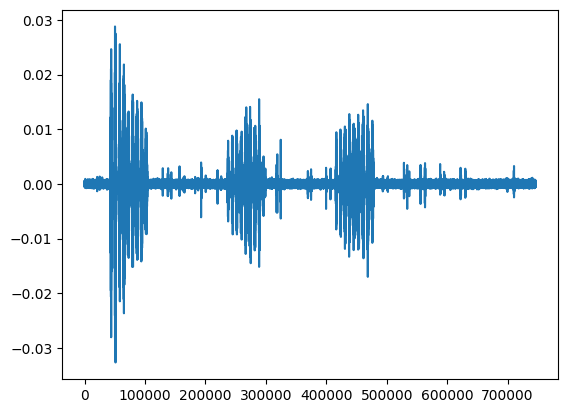

In [24]:
plt.plot(syll)
IPython.display.Audio(data=syll, rate=int(rate/10))

### view spectrogram of syllable

In [25]:
# make a spectrogram
spec = make_spec(
        syll,
        rate,
        hparams=hparams,
        mel_matrix=dataset.mel_matrix,
        use_mel=True,
        use_tensorflow=False,
    
    )
np.shape(spec)

(64, 29853)

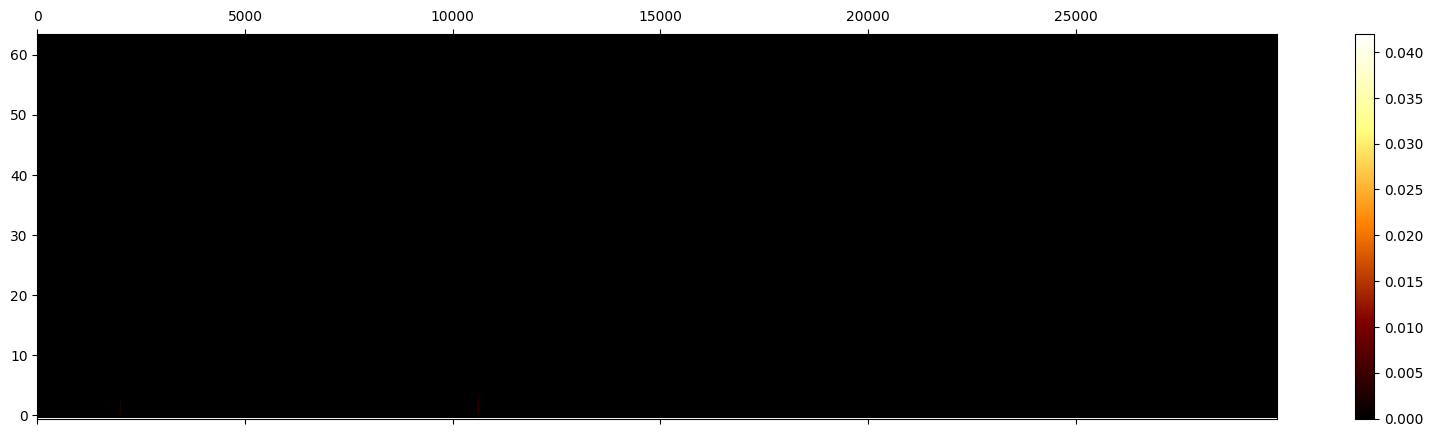

PROJECT_DIR set on:  /data0/home/h21/luas6629/Thesis
PROJECT_DIR set on:  /data0/home/h21/luas6629/Thesis
PROJECT_DIR set on:  /data0/home/h21/luas6629/Thesis
PROJECT_DIR set on:  /data0/home/h21/luas6629/Thesis
PROJECT_DIR set on:  /data0/home/h21/luas6629/Thesis
PROJECT_DIR set on:  /data0/home/h21/luas6629/Thesis
PROJECT_DIR set on:  /data0/home/h21/luas6629/Thesis
PROJECT_DIR set on:  /data0/home/h21/luas6629/Thesis
PROJECT_DIR set on:  /data0/home/h21/luas6629/Thesis
PROJECT_DIR set on:  /data0/home/h21/luas6629/Thesis
PROJECT_DIR set on:  /data0/home/h21/luas6629/Thesis
PROJECT_DIR set on:  /data0/home/h21/luas6629/Thesis
PROJECT_DIR set on:  /data0/home/h21/luas6629/Thesis
PROJECT_DIR set on:  /data0/home/h21/luas6629/Thesis
PROJECT_DIR set on:  /data0/home/h21/luas6629/Thesis
PROJECT_DIR set on:  /data0/home/h21/luas6629/Thesis
PROJECT_DIR set on:  /data0/home/h21/luas6629/Thesis
PROJECT_DIR set on:  /data0/home/h21/luas6629/Thesis
PROJECT_DIR set on:  /data0/home/h21/luas6629/

In [26]:
visualize_spec(spec)

### view a set of spectrograms from dataset

In [35]:
element = "syllables"

DATASET_ID = 'fruitbat'#'tachibana_gerbil'
# create a dataset object
dataset = DataSet(DATASET_ID, hparams = hparams)

In [36]:
datafile = list(dataset.data_files.values())[0]

In [37]:
n_elements = len(
    datafile.data["indvs"][list(datafile.data["indvs"])[0]][element]["start_times"]
)
n_elements

203

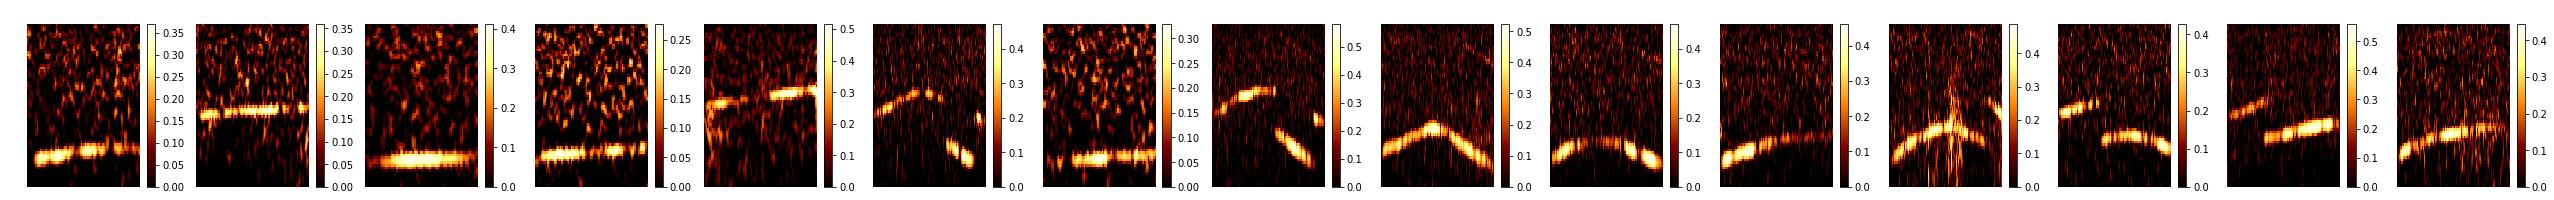

In [38]:
n_elements = 15
specs = []
for element_number in tqdm(range(n_elements)):
    rate, syll = get_element(datafile, indv, element_number, element, dataset.hparams)
    spec = make_spec(
        syll,
        rate,
        hparams=hparams,
        mel_matrix=dataset.mel_matrix,
        use_mel=True,
        use_tensorflow=False,
    
    )
    specs.append(spec)
    
fig, axs = plt.subplots(ncols = n_elements, figsize= (n_elements*3, 3))
for si, spec in enumerate(specs):
    plot_spec(spec, fig, axs[si])
    axs[si].axis('off')